In [17]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
def generate_circle_by_angles(t, C, r, theta, phi):
    # Orthonormal vectors n, u, <n,u>=0
    n = array([cos(phi)*sin(theta), sin(phi)*sin(theta), cos(theta)])
    u = array([-sin(phi), cos(phi), 0])
    
    # P(t) = r*cos(t)*u + r*sin(t)*(n x u) + C
    P_circle = r*cos(t)[:,newaxis]*u + r*sin(t)[:,newaxis]*cross(n,u) + C
    return P_circle


### Generating 1st dataset

- We can change the following parameters to create the circle we want

In [3]:
r = 3               # Radius
C = array([4,4,3])    # Center
theta = pi #1/180*pi     # Azimuth
phi   = 180/180*pi    # Zenith

In [4]:
t = linspace(-pi, pi, 100)
n = len(t)
P = generate_circle_by_angles(t, C, r, theta, phi)
P += random.normal(size=P.shape) * 0.1 # Add some random noise to the points

### Generating 2nd dataset

In [5]:
r = 3               # Radius
C = array([4,2,3])    # Center
theta = pi/2 #1/180*pi     # Azimuth
phi   = 90/180*pi    # Zenith

In [6]:
t = linspace(-pi, pi, 100)
n = len(t)
P1 = generate_circle_by_angles(t, C, r, theta, phi)
P1 += random.normal(size=P1.shape) * 0.1

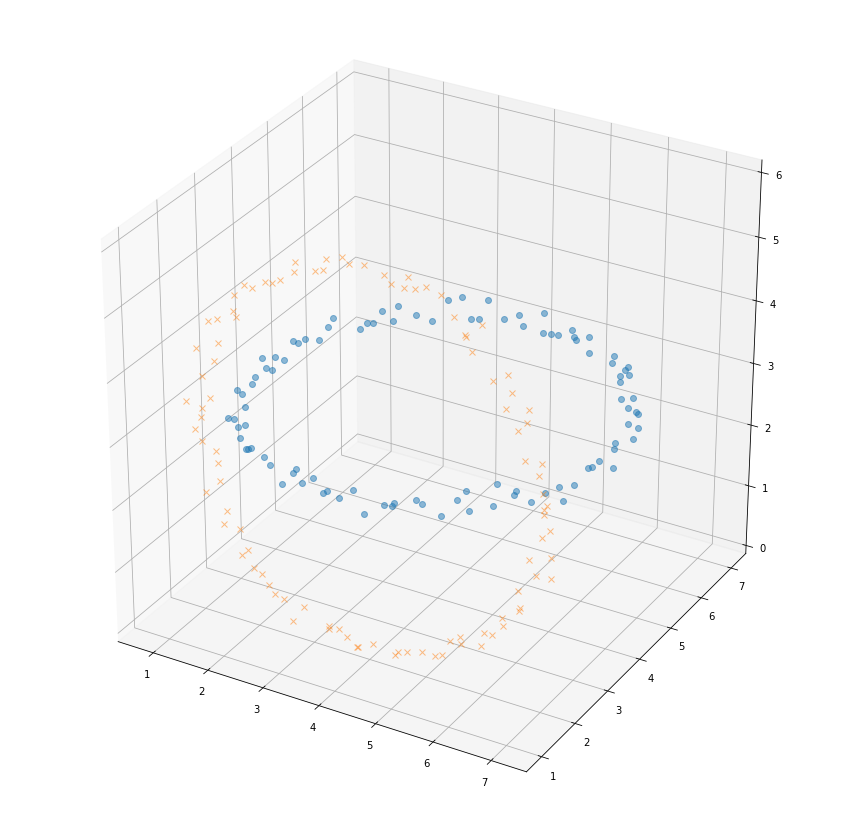

In [7]:
fig = figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(*P.T, ls='', marker='o', alpha=0.5)
ax.plot(*P1.T, ls='', marker='x', alpha=0.5)

In [10]:
P1.shape

(100, 3)

In [29]:
def chain_maker(n_samples1, n_samples2, C1, C2, r1, r2, theta1, theta2, phi1, phi2):
    t1 = linspace(-pi, pi, n_samples1)
    t2 = linspace(-pi, pi, n_samples2)
       # Orthonormal vectors n, u, <n,u>=0
    n1 = array([cos(phi1)*sin(theta1), sin(phi1)*sin(theta1), cos(theta1)])
    u1 = array([-sin(phi1), cos(phi1), 0])
    n2 = array([cos(phi2)*sin(theta2), sin(phi2)*sin(theta2), cos(theta2)])
    u2 = array([-sin(phi2), cos(phi2), 0])
      # P(t) = r*cos(t)*u + r*sin(t)*(n x u) + C
    P1 = r1*cos(t1)[:,newaxis]*u1 + r1*sin(t1)[:,newaxis]*cross(n1,u1) + C1 + random.normal(size=(n_samples1, 3)) * 0.1
    P2 = r2*cos(t2)[:,newaxis]*u2 + r2*sin(t2)[:,newaxis]*cross(n2,u2) + C2 + random.normal(size=(n_samples2, 3)) * 0.1
    return P1, P2

In [31]:
P1, P2 = chain_maker(100, 100, [4,2,3], [4,4,3], 3, 3, pi/2, pi, 0.5*pi, pi)

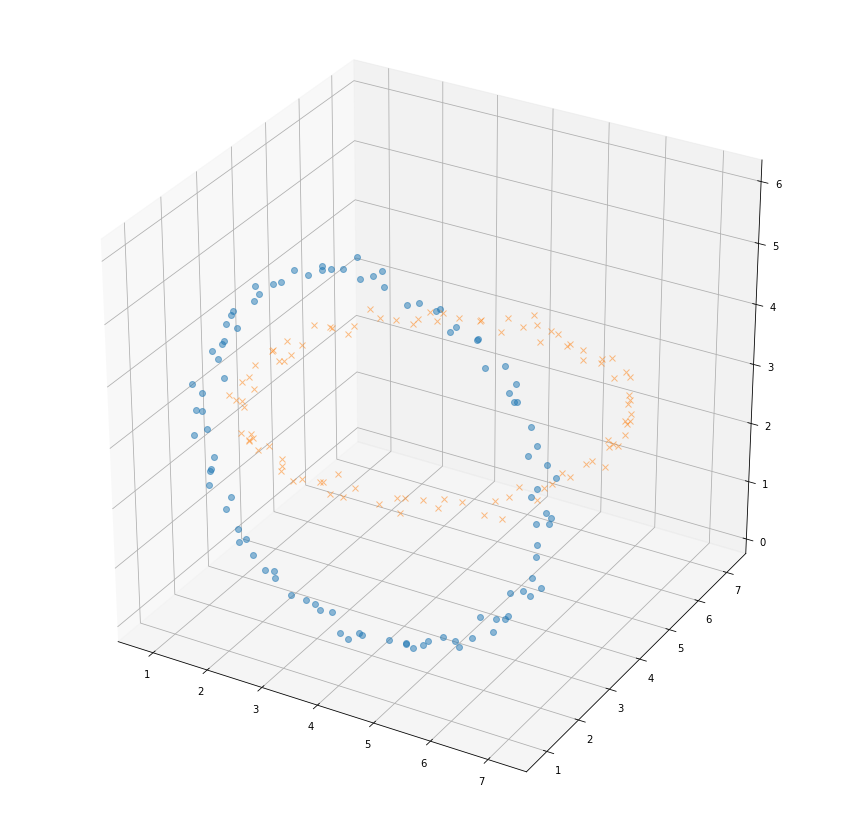

In [32]:
fig = figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(*P1.T, ls='', marker='o', alpha=0.5)
ax.plot(*P2.T, ls='', marker='x', alpha=0.5)

### Visualization with Plotly

In [27]:
import plotly.graph_objects as go

In [31]:
fig = figure(figsize=(15,15))

fig = go.Figure(data=[go.Scatter3d(x=P1.T[0], y=P1.T[1], z=P1.T[2],
                                   mode="markers")])
fig.show()
#fig = go.Figure(data=[go.Scatter3d(x=P.T[0], y=P.T[1], z=P.T[2],
 #                                  mode='markers')])

#fig.show()

<Figure size 1080x1080 with 0 Axes>

In [9]:
linspace(-pi, pi, 5)

array([-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265])

In [81]:
fig = go.Figure(data=[go.Scatter3d(x=P1.T[0], y=P1.T[1], z=P1.T[2],
                                  mode='markers')])
fig.show()

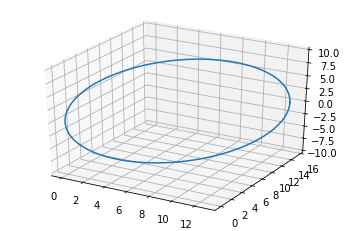

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = np.linspace(0, 2 * np.pi, 201)
y = 10*np.cos(theta)
z = 10*np.sin(theta)
phi = i*np.pi/9
ax.plot(y*np.sin(phi)+10*np.sin(phi),
            y*np.cos(phi)+10*np.cos(phi), z)

In [82]:
pts = np.loadtxt(np.DataSource().open('https://raw.githubusercontent.com/plotly/datasets/master/mesh_dataset.txt'))
x, y, z = pts.T

### First graph
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z,
                   alphahull=5,
                   opacity=0.4,
                   color='cyan')])
#fig.show()
#######

data = fig._data

x = [0, 1, 0]
y = [0, 2, 3]
tvects = [x,y]
orig = [0,0,0]
df=[]
coords = [[orig, np.sum([orig, v],axis=0)] for v in tvects]

# ['circle', 'circle-open', 'square', 'square-open','diamond', 'diamond-open', 'cross', 'x']

for i,c in enumerate(coords):
    X1, Y1, Z1 = zip(c[0])
    X2, Y2, Z2 = zip(c[1])
    vector = go.Scatter3d(x = [X1[0],X2[0]],
                          y = [Y1[0],Y2[0]],
                          z = [Z1[0],Z2[0]],
                          marker = dict(size = [15,15],
                                        color = ['blue'],
                                        symbol = 'diamond',
                                        line=dict(width=500,
                                                  #color='red'
                                                 )),
                          name = 'Vector'+str(i+1))
    data.append(vector)

### Second graph
fig = go.Figure(data=data)
fig.show()
########